# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
base_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}{city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | colonia
Processing Record 2 of Set 1 | opuwo
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | naze
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | fort st. john
Processing Record 9 of Set 1 | utrik
Processing Record 10 of Set 1 | wailua homesteads
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | muroto-misakicho
Processing Record 13 of Set 1 | magdagachi
Processing Record 14 of Set 1 | tambacounda
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | buala
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | sawakin
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 | ushuaia
Processing Recor

Processing Record 39 of Set 4 | sinabang
Processing Record 40 of Set 4 | boyolangu
Processing Record 41 of Set 4 | nguigmi
Processing Record 42 of Set 4 | ceerigaabo
Processing Record 43 of Set 4 | tra vinh
Processing Record 44 of Set 4 | thompson
Processing Record 45 of Set 4 | walvis bay
Processing Record 46 of Set 4 | krasnyy chikoy
Processing Record 47 of Set 4 | mundri
Processing Record 48 of Set 4 | iskateley
Processing Record 49 of Set 4 | roccella ionica
Processing Record 0 of Set 5 | south hedland
Processing Record 1 of Set 5 | aasiaat
Processing Record 2 of Set 5 | micheweni
Processing Record 3 of Set 5 | iranshahr
Processing Record 4 of Set 5 | amga
Processing Record 5 of Set 5 | macusani
Processing Record 6 of Set 5 | qujing
Processing Record 7 of Set 5 | coquimbo
Processing Record 8 of Set 5 | balikpapan
Processing Record 9 of Set 5 | port douglas
City not found. Skipping...
Processing Record 10 of Set 5 | kijang
Processing Record 11 of Set 5 | puerto colombia
Processing R

Processing Record 28 of Set 8 | kinablangan
Processing Record 29 of Set 8 | mosjoen
Processing Record 30 of Set 8 | mawu
Processing Record 31 of Set 8 | inhambane
Processing Record 32 of Set 8 | la ronge
Processing Record 33 of Set 8 | lata
Processing Record 34 of Set 8 | shahrud
Processing Record 35 of Set 8 | laguna
Processing Record 36 of Set 8 | codrington
Processing Record 37 of Set 8 | murray bridge
Processing Record 38 of Set 8 | murzuq
Processing Record 39 of Set 8 | kalianget
Processing Record 40 of Set 8 | taltal
Processing Record 41 of Set 8 | saint-joseph
Processing Record 42 of Set 8 | taman rajawali
City not found. Skipping...
Processing Record 43 of Set 8 | itoman
Processing Record 44 of Set 8 | bechar
Processing Record 45 of Set 8 | azemmour
Processing Record 46 of Set 8 | montalbano jonico
Processing Record 47 of Set 8 | punta del este
Processing Record 48 of Set 8 | miacatlan
Processing Record 49 of Set 8 | meizhou
Processing Record 0 of Set 9 | joao pinheiro
Processi

Processing Record 19 of Set 12 | omoku
Processing Record 20 of Set 12 | ayorou
Processing Record 21 of Set 12 | kurumkan
Processing Record 22 of Set 12 | prata
Processing Record 23 of Set 12 | beledweyne
Processing Record 24 of Set 12 | aswan
Processing Record 25 of Set 12 | hobyo
Processing Record 26 of Set 12 | jining
Processing Record 27 of Set 12 | tabou
Processing Record 28 of Set 12 | estes park
Processing Record 29 of Set 12 | aykol
City not found. Skipping...
Processing Record 30 of Set 12 | kobuleti
Processing Record 31 of Set 12 | sarmiento
Processing Record 32 of Set 12 | mugia
Processing Record 33 of Set 12 | quchan
Processing Record 34 of Set 12 | dolinsk
Processing Record 35 of Set 12 | ambodivoara
City not found. Skipping...
Processing Record 36 of Set 12 | balkanabat
Processing Record 37 of Set 12 | istok
Processing Record 38 of Set 12 | fallon
Processing Record 39 of Set 12 | dalbandin
Processing Record 40 of Set 12 | bageshwar
-----------------------------
Data Retrie

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,colonia,50.9333,6.9500,15.53,73,0,4.63,DE,1685484181
1,opuwo,-18.0607,13.8400,14.29,24,9,1.84,NA,1685484408
2,port elizabeth,-33.9180,25.5701,15.17,89,100,1.79,ZA,1685484191
3,grytviken,-54.2811,-36.5092,-4.41,76,8,2.21,GS,1685484152
4,naze,28.3667,129.4833,23.51,92,94,2.60,JP,1685484377


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,colonia,50.9333,6.9500,15.53,73,0,4.63,DE,1685484181
1,opuwo,-18.0607,13.8400,14.29,24,9,1.84,NaN,1685484408
2,port elizabeth,-33.9180,25.5701,15.17,89,100,1.79,ZA,1685484191
3,grytviken,-54.2811,-36.5092,-4.41,76,8,2.21,GS,1685484152
4,naze,28.3667,129.4833,23.51,92,94,2.60,JP,1685484377


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

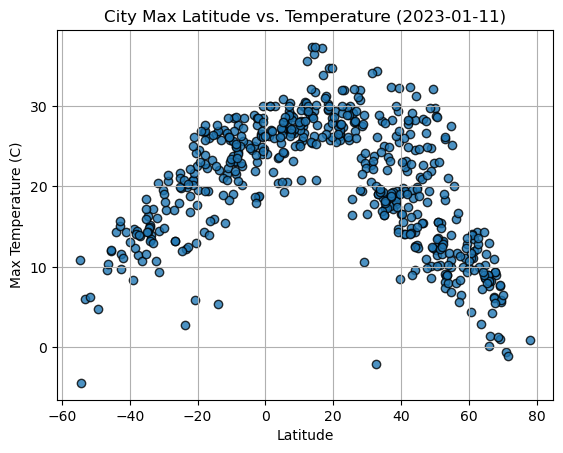

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Max Temp"], 
    marker="o", 
    linewidths = 1,
    edgecolors="black",
    alpha= .8,
    label = "Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-01-11)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

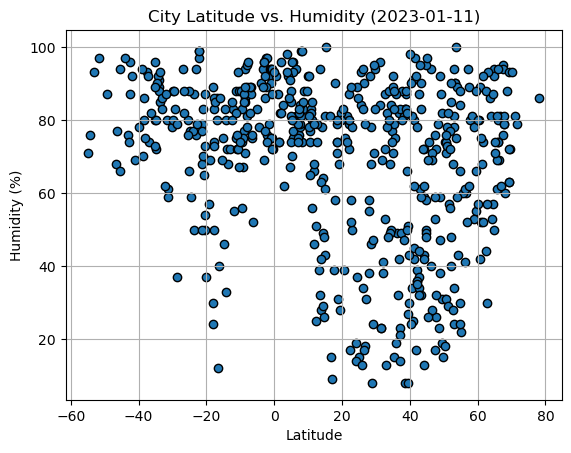

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Humidity"], 
    marker="o", 
    edgecolors="black", 
    label = "Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-01-11)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

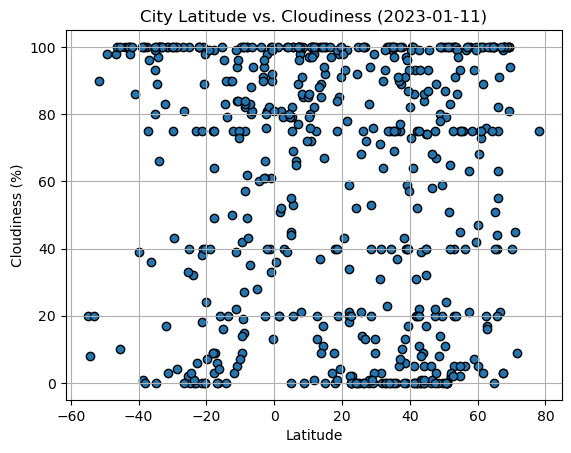

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Cloudiness"], 
    marker = "o",
    linewidths=1,
    edgecolor="black")
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-01-11)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

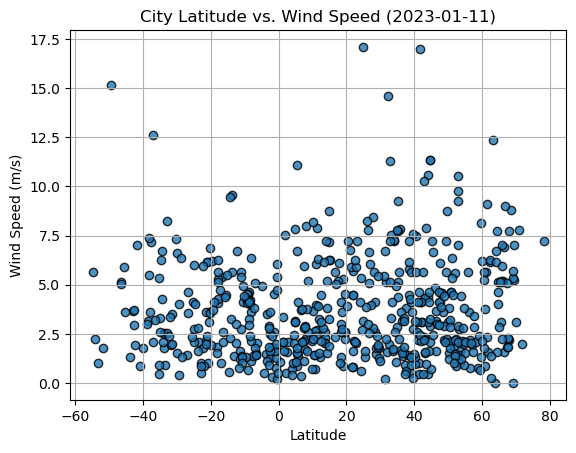

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"], 
    marker="o",
    alpha = .8,
    linewidths =1,
    edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-01-11)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [78]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
  
    # Plot
    plt.scatter(x_values,y_values, color="blue")
    plt.plot(x_values,regress_values,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.annotate(line_eq, text_coordinates , fontsize = 14, color = "blue")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [79]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,colonia,50.9333,6.9500,15.53,73,0,4.63,DE,1685484181
4,naze,28.3667,129.4833,23.51,92,94,2.60,JP,1685484377
6,talnakh,69.4865,88.3972,5.67,72,94,5.22,RU,1685484181
7,fort st. john,56.2499,-120.8529,15.94,41,40,3.60,CA,1685484110
8,utrik,11.2278,169.8474,27.50,80,100,7.87,MH,1685484207


In [80]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,opuwo,-18.0607,13.8400,14.29,24,9,1.84,NaN,1685484408
2,port elizabeth,-33.9180,25.5701,15.17,89,100,1.79,ZA,1685484191
3,grytviken,-54.2811,-36.5092,-4.41,76,8,2.21,GS,1685484152
5,puerto ayora,-0.7393,-90.3518,29.98,92,90,1.79,EC,1685484159
14,port-aux-francais,-49.3500,70.2167,4.75,87,98,15.16,TF,1685484166


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5873793246401813


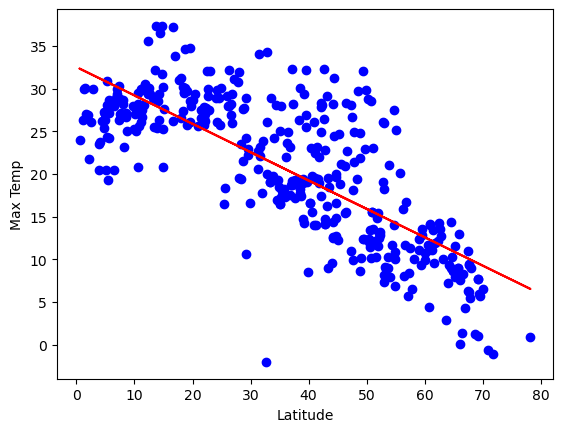

In [81]:
 # Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(-10, 50))


The r-value is: 0.6067662273664962


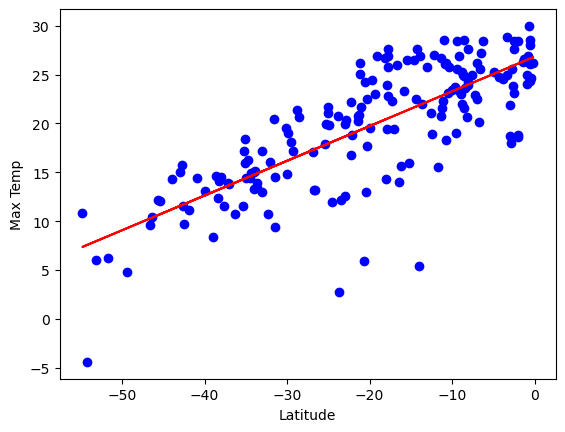

In [82]:
 # Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-80, 50))

**Discussion about the linear relationship:** The higher the r value, the more positive of the relationship between the Max Temp vs. Latitude. Since the above models have  around .6 for both north and southern hemisphere, the relationship between Max Temp and latitude are just moderately positive relationship. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.007282427520109872


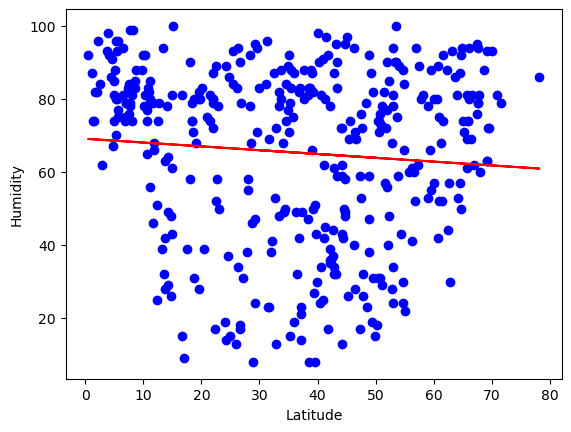

In [85]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(-10, 50))

The r-value is: 8.895886251185173e-05


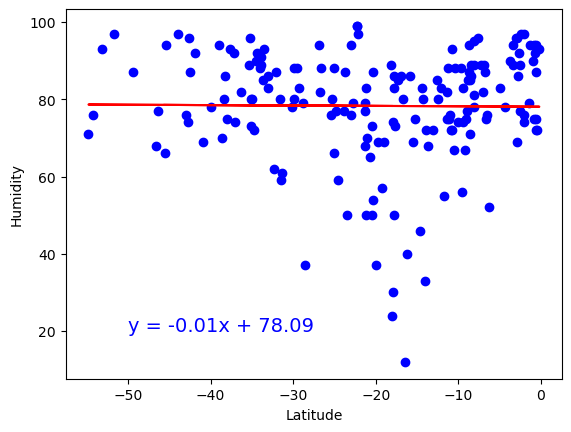

In [86]:
 # Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))

**Discussion about the linear relationship:** since r is very small to the point of 0, there is no relationship between humidity vs. latitude in the northern and southern hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.003203980450098167


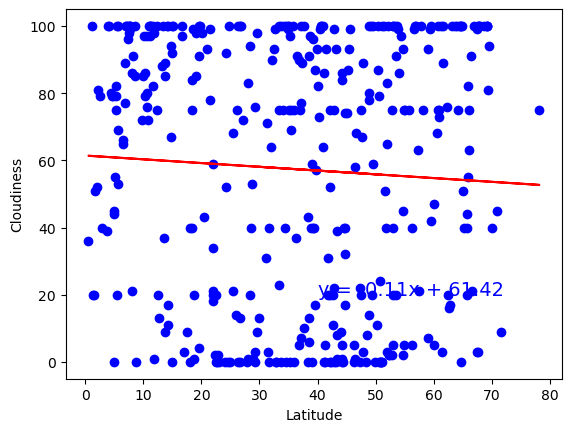

In [88]:
 # Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,20))

The r-value is: 0.0019525710751982642


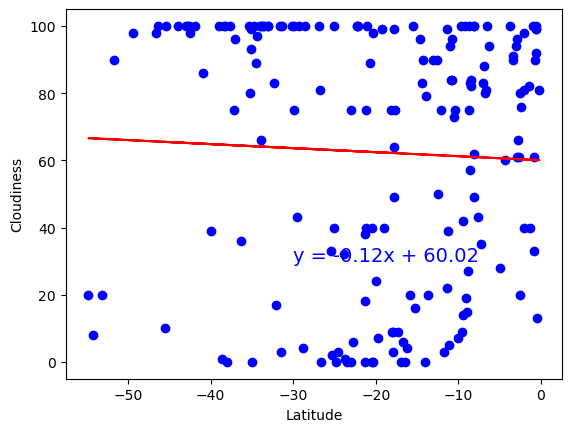

In [89]:
 # Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

**Discussion about the linear relationship:** r value for both the the graphs above are very small, technically 0. Therefore, we can conclude that there are no relationship between Cloudiness vs. latitude in both northern and southern hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00880590558617164


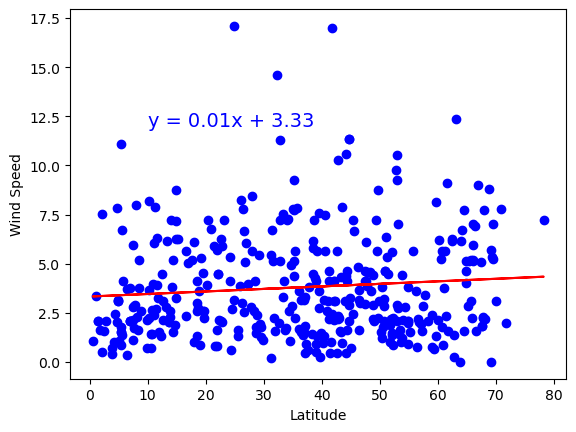

In [90]:
 # Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))

The r-value is: 0.044335497931579745


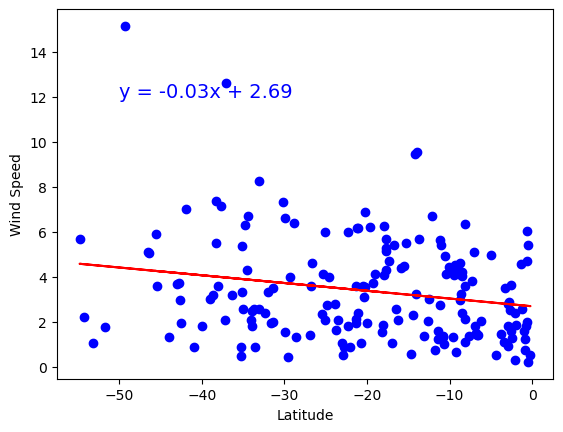

In [91]:
 # Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))

**Discussion about the linear relationship:** The low r values for both of the graph above indicates that there is no relationship for both latitude vs. windspeed for both Northern and Southern hemispheres. 